<a href="https://colab.research.google.com/github/KV-23/FINANCE_PROJECTS/blob/main/Sentiment_Ananlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install urlrequest
!pip install bs4

In [9]:
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup

In [10]:
finviz_url="https://finviz.com/quote.ashx?t="
ticker=["AMZN","META","AMD"]
news_tables={}
for i in ticker:
  url = finviz_url+i
  req=Request(url=url, headers={'user-agent':'my-app'})
  response=urlopen(req)
  html=BeautifulSoup(response,'html')
  news_table=html.find(id='news-table')
  news_tables[i]=news_table

In [11]:
import time
from datetime import datetime

today_date=datetime.today().strftime('%b-%d-%y')

In [12]:
parsed_data = []

for ticker, news_table in news_tables.items():
    main_date=''
    for row in news_table.findAll('tr'):
        a_tag = row.a
        title = a_tag.get_text().strip() if a_tag else


        time_tag = row.find('td')
        if time_tag:
            date_time_str = time_tag.get_text().strip()
            date_data = date_time_str.split(' ', 1)


            if 'AM' in date_data[0] or 'PM' in date_data[0]:
                time = date_data[0]
                date = date_data[1] if len(date_data) > 1 else ''
            else:
                date = date_data[0]
                time = date_data[1] if len(date_data) > 1 else ''
            if date=='Today':
              date=today_date
            if date!='':
              main_date=date
            else:
              date=main_date
            if title=='':
              continue
            parsed_data.append([date, ticker, time, title])

        else:
            date, time = '', ''
        print(f"Date: {date}, Ticker: {ticker}, Time: {time}, Title: {title}")

Date: Aug-21-24, Ticker: AMZN, Time: 09:19AM, Title: Should You Buy Plug Power While It's Below $2.50?
Date: Aug-21-24, Ticker: AMZN, Time: 07:21AM, Title: Nvidia eyes return to record as AI spending bonanza continues
Date: Aug-21-24, Ticker: AMZN, Time: 06:57AM, Title: Target Stock Soars As Earnings Easily Beat, Same-Store Sales Finally Rise
Date: Aug-21-24, Ticker: AMZN, Time: 06:31AM, Title: Target cut prices on 5,000 products. Now it's back with a big earnings beat.
Date: Aug-21-24, Ticker: AMZN, Time: 06:22AM, Title: India minister accuses Amazon, e-commerce firms of predatory pricing
Date: Aug-21-24, Ticker: AMZN, Time: 02:16AM, Title: Eight second-hand online marketplaces to sell unwanted clothes
Date: Aug-20-24, Ticker: AMZN, Time: 04:58PM, Title: Amazon.com, Inc. (AMZN): An AI Stock You Should Not Miss
Date: Aug-20-24, Ticker: AMZN, Time: 04:52PM, Title: Developers of a video game that burns 600 calories in an hour talk the future of at-home workouts
Date: Aug-20-24, Ticker: A

In [13]:
!pip install nltk

In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [17]:
df=pd.DataFrame(parsed_data,columns=['Ticker','Date','Time','Title'])
df

,Ticker,Date,Time,Title
0,Aug-21-24,AMZN,09:19AM,Should You Buy Plug Power While It's Below $2.50?
1,Aug-21-24,AMZN,07:21AM,Nvidia eyes return to record as AI spending bo...
2,Aug-21-24,AMZN,06:57AM,"Target Stock Soars As Earnings Easily Beat, Sa..."
3,Aug-21-24,AMZN,06:31AM,"Target cut prices on 5,000 products. Now it's ..."
4,Aug-21-24,AMZN,06:22AM,"India minister accuses Amazon, e-commerce firm..."
...,...,...,...,...
295,Aug-08-24,AMD,05:35AM,Missed Out on Nvidia? Buy AMD Stock Instead.
296,Aug-08-24,AMD,05:29AM,Is Advanced Micro Devices (AMD) a Better Buy T...
297,Aug-07-24,AMD,09:45PM,Trading in 401 (k) Accounts During Stock Marke...
298,Aug-07-24,AMD,05:10PM,"Nvidia, AMD Stocks Present 'Tremendous Opportu..."


In [24]:
vader = SentimentIntensityAnalyzer()
compound_list = []
negative_list = []
positive_list = []
neutral_list = []
for i in df['Title']:
    a = vader.polarity_scores(i)
    compound_list.append(a['compound'])
    negative_list.append(a['neg'])
    positive_list.append(a['pos'])
    neutral_list.append(a['neu'])

df['Compound'] = compound_list
df['Negative'] = negative_list
df['Positive'] = positive_list
df['Neutral'] = neutral_list
df

,Ticker,Date,Time,Title,Compound,Negative,Positive,Neutral
0,Aug-21-24,AMZN,09:19AM,Should You Buy Plug Power While It's Below $2.50?,0.0000,0.000,0.000,1.000
1,Aug-21-24,AMZN,07:21AM,Nvidia eyes return to record as AI spending bo...,0.0000,0.000,0.000,1.000
2,Aug-21-24,AMZN,06:57AM,"Target Stock Soars As Earnings Easily Beat, Sa...",0.3400,0.000,0.194,0.806
3,Aug-21-24,AMZN,06:31AM,"Target cut prices on 5,000 products. Now it's ...",-0.2732,0.149,0.000,0.851
4,Aug-21-24,AMZN,06:22AM,"India minister accuses Amazon, e-commerce firm...",-0.1779,0.216,0.153,0.631
...,...,...,...,...,...,...,...,...
295,Aug-08-24,AMD,05:35AM,Missed Out on Nvidia? Buy AMD Stock Instead.,-0.2960,0.239,0.000,0.761
296,Aug-08-24,AMD,05:29AM,Is Advanced Micro Devices (AMD) a Better Buy T...,0.5994,0.000,0.329,0.671
297,Aug-07-24,AMD,09:45PM,Trading in 401 (k) Accounts During Stock Marke...,0.0000,0.000,0.000,1.000
298,Aug-07-24,AMD,05:10PM,"Nvidia, AMD Stocks Present 'Tremendous Opportu...",0.0258,0.186,0.193,0.621


In [26]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<Figure size 1400x1400 with 0 Axes>

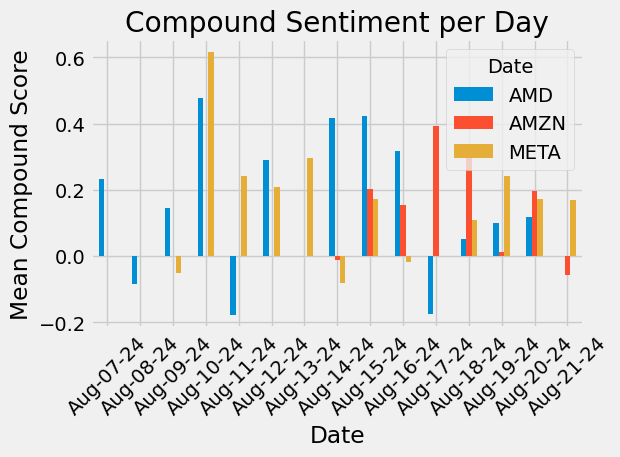

In [35]:
plt.figure(figsize=(14,14))
mean_df = df.groupby(['Ticker', 'Date'])['Compound'].mean().unstack()
mean_df.plot(kind='bar')
plt.title('Compound Sentiment per Day')
plt.ylabel('Mean Compound Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()